In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
wine_data=pd.read_csv("wine.csv")
wine_data=wine_data.drop('Type',axis=1)
wine_data.describe()
wine_data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
list= ([x for x in range(1, len(wine_data.values)+1)])

In [4]:
list1=str(list)

In [5]:
type(list1)

str

In [6]:
wine_data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
# Considering only numerical data 
wine_data.data = wine_data.iloc[:,1:]
wine_data.data.head()
# Converting into numpy array
wine_df = wine_data.data.values
wine_df

array([[1.710e+00, 2.430e+00, 1.560e+01, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.780e+00, 2.140e+00, 1.120e+01, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [2.360e+00, 2.670e+00, 1.860e+01, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [4.280e+00, 2.260e+00, 2.000e+01, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [2.590e+00, 2.370e+00, 2.000e+01, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [4.100e+00, 2.740e+00, 2.450e+01, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [9]:
# Normalizing the numerical data 
wine_normal = scale(wine_df)

In [10]:
wine_normal

array([[-0.5622498 ,  0.23205254, -1.16959318, ...,  0.36217728,
         1.84791957,  1.01300893],
       [-0.49941338, -0.82799632, -2.49084714, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.02123125,  1.10933436, -0.2687382 , ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.74474449, -0.38935541,  0.15166079, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.22769377,  0.01273209,  0.15166079, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.58316512,  1.36520822,  1.50294326, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [11]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)

In [12]:
pca_values

array([[-3.07857252, -1.2192618 , -0.38806977, ...,  0.11988943,
         0.88805186, -0.07321096],
       [-2.19079587,  0.66456824, -1.92210947, ..., -0.18027824,
         0.28014967,  0.01377333],
       [-2.45644079, -1.5058111 ,  0.55648903, ..., -0.48294544,
        -0.13761134,  0.02907391],
       ...,
       [ 2.88825847, -2.42076977, -1.66541827, ...,  0.45903343,
         0.48941557,  0.08736234],
       [ 2.55190832, -2.08637202, -1.17521266, ...,  0.42545762,
         0.26549105, -0.01447492],
       [ 3.53573264, -2.12257387,  0.88160906, ..., -0.04465287,
         0.07663817, -0.33835467]])

In [13]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(wine_normal)

In [15]:
# The amount of variance that each PCA explains is 
variance = pca.explained_variance_ratio_
variance

array([0.38612318, 0.16881157, 0.11376556, 0.07656743, 0.06636326,
       0.05077993])

In [17]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([38.61, 55.49, 66.87, 74.53, 81.17, 86.25])

In [18]:
pca.components_

array([[ 0.25929907,  0.01550401,  0.23457717, -0.12997254, -0.39396388,
        -0.4262194 ,  0.30156031, -0.31599638,  0.12050505, -0.31314859,
        -0.38744   , -0.26504376],
       [-0.22363659, -0.45446769, -0.08389744, -0.41000066, -0.14109614,
        -0.07041646, -0.01025314, -0.13306564, -0.53637656,  0.27207746,
         0.11846639, -0.38712793],
       [ 0.04407439,  0.54359695,  0.6257736 , -0.04358717,  0.1067167 ,
         0.13134819,  0.21696829,  0.07955089, -0.30000831,  0.18463194,
         0.2156754 , -0.23751456],
       [ 0.53647394, -0.20779976,  0.06350945, -0.37846661,  0.20173256,
         0.15565564, -0.1863573 ,  0.3918301 ,  0.06138937, -0.41833833,
         0.19055586, -0.23124193],
       [ 0.12527868, -0.11626212,  0.17317714,  0.65986637, -0.18791061,
        -0.11683611, -0.54518489,  0.03906619, -0.27707183, -0.09913243,
         0.00238728, -0.26656873],
       [-0.5878703 , -0.19640955,  0.26881966,  0.04352827,  0.01066728,
        -0.019332  ,  

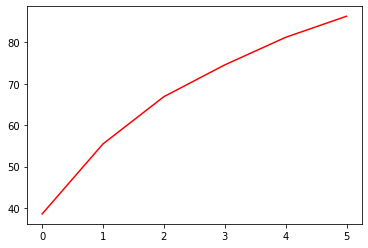

In [19]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [20]:
 pca_values[:,0:1]

array([[-3.07857252],
       [-2.19079587],
       [-2.45644079],
       [-3.42275012],
       [-0.94897588],
       [-2.76731538],
       [-2.18375478],
       [-1.8263214 ],
       [-2.19383381],
       [-2.59000186],
       [-3.26089058],
       [-1.55488981],
       [-1.96567565],
       [-3.14743458],
       [-4.00629989],
       [-2.13051424],
       [-1.87351026],
       [-1.70365337],
       [-3.238178  ],
       [-1.94408078],
       [-2.94642239],
       [-1.09489837],
       [-2.4456023 ],
       [-1.70081887],
       [-1.72046805],
       [-0.96736682],
       [-1.68327066],
       [-1.18897314],
       [-2.0440134 ],
       [-2.09994017],
       [-2.34841466],
       [-2.52075473],
       [-1.5334142 ],
       [-1.7198793 ],
       [-1.3083414 ],
       [-1.83755336],
       [-1.3168969 ],
       [-1.11112978],
       [-1.52935162],
       [-2.26855413],
       [-2.48051126],
       [-0.59309439],
       [-2.8906988 ],
       [-0.41033555],
       [-2.10640792],
       [-0

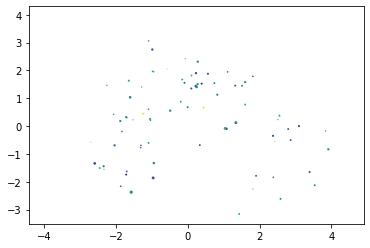

In [21]:
# plot between PCA1 and PCA2 
w = pca_values[:,0:1]
x = pca_values[:,1:2]
y = pca_values[:,2:3]
z = pca_values[:,3:4]
plt.scatter(w,x,y,z)

In [26]:
final_wine_df = pd.concat([pd.DataFrame(pca_values[:,0:4],columns=['pc1','pc2','pc3','pc4'])], axis = 1)

In [27]:
pca_values[:,0:4]

array([[-3.07857252e+00, -1.21926180e+00, -3.88069767e-01,
        -2.39523061e-01],
       [-2.19079587e+00,  6.64568240e-01, -1.92210947e+00,
        -2.91410650e-01],
       [-2.45644079e+00, -1.50581110e+00,  5.56489034e-01,
         7.23595832e-01],
       [-3.42275012e+00, -2.55605831e+00, -7.03345739e-01,
         5.64575214e-01],
       [-9.48975875e-01, -1.32973488e+00,  1.76063170e+00,
        -4.11976922e-01],
       [-2.76731538e+00, -1.77985016e+00, -9.44531169e-01,
        -5.06330177e-01],
       [-2.18375478e+00, -4.58036710e-01, -8.05131410e-01,
        -2.80189959e-02],
       [-1.82632140e+00, -1.33985744e+00, -2.81585363e-03,
        -1.18965608e+00],
       [-2.19383381e+00,  2.03202783e-01, -1.37391008e+00,
         9.22449832e-02],
       [-2.59000186e+00, -4.35609334e-01, -1.00682982e+00,
         3.59339550e-01],
       [-3.26089058e+00, -1.03803643e+00, -5.51904036e-01,
         3.52510697e-02],
       [-1.55488981e+00,  1.04878503e-01, -9.22660838e-01,
      

In [28]:
final_wine_df

,pc1,pc2,pc3,pc4
0,-3.078573,-1.219262,-0.388070,-0.239523
1,-2.190796,0.664568,-1.922109,-0.291411
2,-2.456441,-1.505811,0.556489,0.723596
3,-3.422750,-2.556058,-0.703346,0.564575
4,-0.948976,-1.329735,1.760632,-0.411977
...,...,...,...,...
173,3.620616,-1.471886,-0.449822,1.078210
174,2.768177,-1.426121,-0.042165,0.338689
175,2.888258,-2.420770,-1.665418,0.246305
176,2.551908,-2.086372,-1.175213,-0.737707


In [30]:
final_wine_data=final_wine_df.drop('pc4',axis=1)

In [31]:
final_wine_data

,pc1,pc2,pc3
0,-3.078573,-1.219262,-0.388070
1,-2.190796,0.664568,-1.922109
2,-2.456441,-1.505811,0.556489
3,-3.422750,-2.556058,-0.703346
4,-0.948976,-1.329735,1.760632
...,...,...,...
173,3.620616,-1.471886,-0.449822
174,2.768177,-1.426121,-0.042165
175,2.888258,-2.420770,-1.665418
176,2.551908,-2.086372,-1.175213


In [32]:
final_wine_data.head()

,pc1,pc2,pc3
0,-3.078573,-1.219262,-0.388070
1,-2.190796,0.664568,-1.922109
2,-2.456441,-1.505811,0.556489
3,-3.422750,-2.556058,-0.703346
4,-0.948976,-1.329735,1.760632


In [33]:
final_wine_data.describe()

,pc1,pc2,pc3
count,1.780000e+02,1.780000e+02,1.780000e+02
mean,2.270344e-16,-3.492836e-17,5.862976e-17
std,2.158624e+00,1.427299e+00,1.171708e+00
min,-4.006300e+00,-3.153657e+00,-3.834600e+00
25%,-1.881713e+00,-1.174705e+00,-8.384465e-01
50%,-2.621748e-01,-8.518214e-02,-8.781798e-02
75%,2.172636e+00,1.029692e+00,7.454193e-01
max,4.479201e+00,3.947497e+00,4.516455e+00


In [34]:
final_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     178 non-null    float64
 1   pc2     178 non-null    float64
 2   pc3     178 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


In [35]:
X = final_wine_data.iloc[:,:].values

In [38]:
import seaborn as sns
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

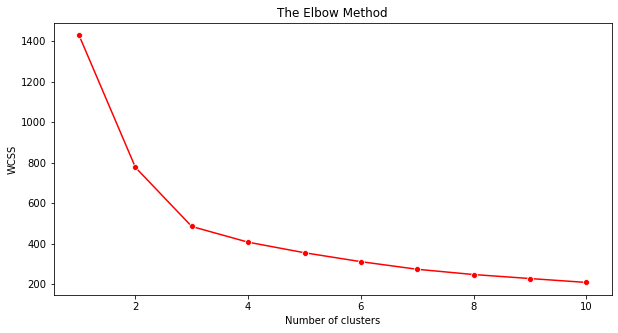

In [39]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

using this we got that no of clusters can be 4,5,6 but we will choose 4.

In [40]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

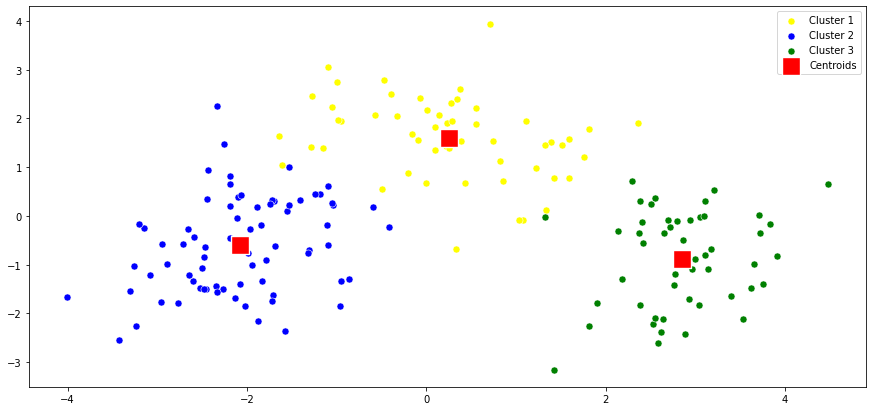

In [41]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.legend()
plt.show()


verify whether data is clustered correctly or not

In [42]:
check_wine_data=pd.read_csv("wine.csv")

In [43]:
check_wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
col_name="Type"
first_col = check_wine_data.pop(col_name)

In [45]:
check_wine_data.insert(13, col_name, first_col)

In [46]:
check_wine_data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [47]:
col_name="Predicted_cluster"
check_wine_data.insert(14, col_name,y_kmeans)

In [48]:
check_wine_data

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type,Predicted_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,2


In [50]:
check_wine_data['Final'] = np.where(check_wine_data['Type'] == check_wine_data['Predicted_cluster'], 'True', 'False') 

In [51]:
check_wine_data

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type,Predicted_cluster,Final
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1,True
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1,True
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1,True
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1,True
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3,2,False
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3,2,False
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,2,False
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,2,False


<AxesSubplot:>

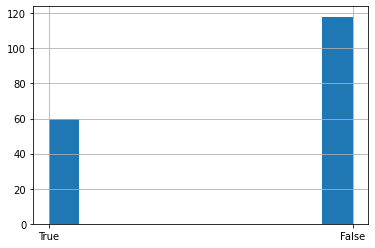

In [52]:
# histogram of Ozone
check_wine_data['Final'].hist()

Thus we got 60 records correctly predicted and 118 as false.

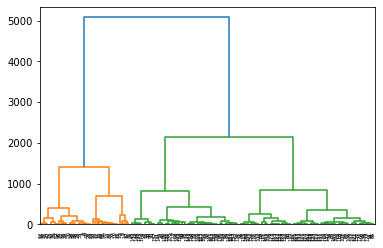

In [53]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# create dendrogram
check1=check_wine_data.iloc[:,:13]
dendrogram = sch.dendrogram(sch.linkage(check1, method='ward'))

In [54]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [55]:
# save clusters for chart
y_hc = hc.fit_predict(X)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [56]:
check1['h_clusterid'] = hc.labels_

<AxesSubplot:>

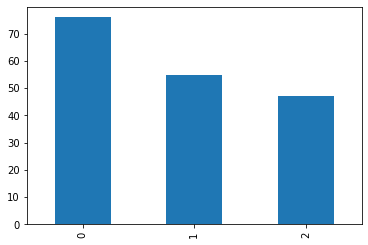

In [57]:
check1['h_clusterid'].value_counts().plot.bar()

In [58]:
check1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [61]:
col_name="Type"
check1.insert(14, col_name,check_wine_data['Type'])

In [62]:
check1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,Type
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1,3


In [63]:
check1['Final'] = np.where(check1['Type'] == check1['h_clusterid'], 'True', 'False') 

<AxesSubplot:>

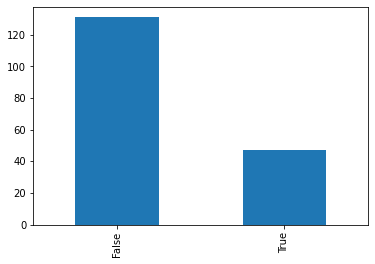

In [64]:
check1['Final'].value_counts().plot.bar()

Around 50% are correctly clustered.